In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('/content/sample_data/breastcancer.csv')
del data['Unnamed: 32']


(569, 33)
(569, 32)


In [4]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [7]:
classifier = Sequential()
classifier.add(Dense(20, input_shape=(X_train.shape[1],), activation='relu')) # hidden layer
classifier.add(Dense(10, activation='relu')) # additional hidden layer
classifier.add(Dense(5, activation='relu'))
classifier.add(Dense(1, activation='sigmoid')) # output layer



In [8]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)


Epoch 1/150
6/6 [==============================] - 2s 4ms/step - loss: 0.6869 - accuracy: 0.5215
Epoch 2/150
6/6 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.6445
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.5308 - accuracy: 0.7910
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.8750
Epoch 5/150
6/6 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.8984
Epoch 6/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3689 - accuracy: 0.9160
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.9238
Epoch 8/150
6/6 [==============================] - 0s 4ms/step - loss: 0.2880 - accuracy: 0.9277
Epoch 9/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.9336
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2293 - accuracy: 0.9355
Epoch 11/150
6/6 [===========

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 9ms/step


In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 96.49122807017544%


<Axes: >

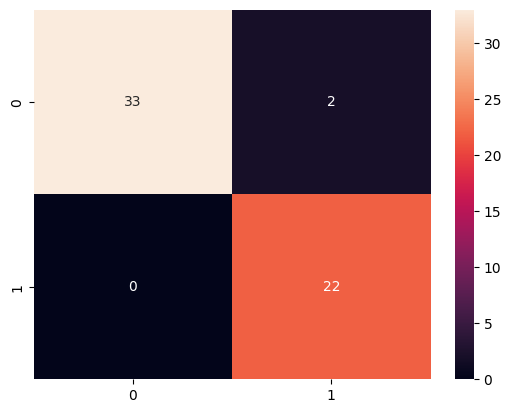

In [13]:
sns.heatmap(cm,annot=True)
